In [1]:
from __future__ import division
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
Bias_list = glob.glob('Cosmonauts_sky_brightness_data/Bias/*.FIT')
Light_list = glob.glob('Cosmonauts_sky_brightness_data/*.FIT')
Dark_list = glob.glob('Cosmonauts_sky_brightness_data/Dark/*.FIT')

In [3]:
for i in range(len(Bias_list)):
    hdr_b = fits.getheader(Bias_list[i])
    print(Bias_list[i],hdr_b['EXPTIME'])

Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000012.BIAS.FIT 0.0
Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000013.BIAS.FIT 0.0
Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000014.BIAS.FIT 0.0
Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000015.BIAS.FIT 0.0
Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000016.BIAS.FIT 0.0
Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000017.BIAS.FIT 0.0
Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000018.BIAS.FIT 0.0
Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000019.BIAS.FIT 0.0
Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000020.BIAS.FIT 0.0
Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000021.BIAS.FIT 0.0
Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000022.BIAS.FIT 0.0
Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000023.BIAS.FIT 0.0
Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000024.BIAS.FIT 0.0
Cosmonauts_sky_brightness_data/Bias\ASTR136_COS.00000025.BIAS.FIT 0.0
Cosmonauts_sky_brigh

In [4]:
for i in range(len(Light_list)):
    hdr_l = fits.getheader(Light_list[i])
    print(Light_list[i],hdr_l['DATE-OBS'],hdr_l['EXPTIME'])
    
for i in range(len(Dark_list)):
    hdr_d = fits.getheader(Dark_list[i])
    print(Dark_list[i],hdr_d['EXPTIME'])

Cosmonauts_sky_brightness_data\ASTR136_COS.00000034.FIT 2019-04-11T12:11:51.167 60.0
Cosmonauts_sky_brightness_data\ASTR136_COS.00000035.FIT 2019-04-11T12:13:43.425 60.0
Cosmonauts_sky_brightness_data\ASTR136_COS.00000036.FIT 2019-04-11T12:14:47.946 60.0
Cosmonauts_sky_brightness_data\ASTR136_COS.00000037.FIT 2019-04-11T12:15:52.484 60.0
Cosmonauts_sky_brightness_data\ASTR136_COS.00000038.FIT 2019-04-11T12:17:50.233 50.0
Cosmonauts_sky_brightness_data\ASTR136_COS.00000039.FIT 2019-04-11T12:18:44.755 50.0
Cosmonauts_sky_brightness_data\ASTR136_COS.00000040.FIT 2019-04-11T12:19:39.277 50.0
Cosmonauts_sky_brightness_data\ASTR136_COS.00000041.FIT 2019-04-11T12:20:48.369 50.0
Cosmonauts_sky_brightness_data\ASTR136_COS.00000042.FIT 2019-04-11T12:21:42.891 50.0
Cosmonauts_sky_brightness_data\ASTR136_COS.00000043.FIT 2019-04-11T12:23:39.127 40.0
Cosmonauts_sky_brightness_data\ASTR136_COS.00000044.FIT 2019-04-11T12:24:23.681 40.0
Cosmonauts_sky_brightness_data\ASTR136_COS.00000045.FIT 2019-04-1

KeyError: "Keyword 'DATE-OBS' not found."

In [5]:
#Define a zero array
Master_Bias = np.zeros(fits.getdata(Bias_list[0]).shape)

#Get master bias
for i in range(len(Bias_list)):
    Master_Bias += fits.getdata(Bias_list[i])

Master_Bias /= len(Bias_list)

print(np.average(Master_Bias))

106.91478162245288


### The good process script

In [6]:
final_science = []

for i in Dark_list:
    data_d = fits.open(i)
    EXPTIME_d = data_d[0].header['EXPTIME']

    for j in Light_list:
        data_l = fits.open(j)
        EXPTIME_l = data_l[0].header['EXPTIME']

        if EXPTIME_d == EXPTIME_l:
            final_light = (data_l[0].data-Master_Bias) #bias correction
            final_light = (data_l[0].data-data_d[0].data)      #dark correction
            counts_per_pixel_per_time  =  np.sum(final_light)/EXPTIME_l/np.prod(final_light.shape)  #divide total counts by exp. time and number of pixels
            
            final_science.append(counts_per_pixel_per_time)

print(final_science)
            

[14.138633645179205, 42.3650984236832, 64.77059630911188, 21.256025332137213, 49.73997554786621, 59.390100166602586, 82.61806069460464, 46.86403444828912, 62.08132159425862, 255.37259592464437, 142.53034397026786, 187.91461694220172, 117.94803665256953, 5.307719659105472, 171.9768028963219, 210.3497688709471, 92.79103045837071, 30.16858524499124, 1.2107815797342902, 283.3174044171045, 119.5373889529668]


### From MaxDL6

In [2]:
Light_list60 = glob.glob('Cosmonauts_sky_brightness_data/Final_Science/60s/*.FIT')
Light_list50 = glob.glob('Cosmonauts_sky_brightness_data/Final_Science/50s/*.FIT')
Light_list40 = glob.glob('Cosmonauts_sky_brightness_data/Final_Science/40s/*.FIT')
Light_list30 = glob.glob('Cosmonauts_sky_brightness_data/Final_Science/30s/*.FIT')

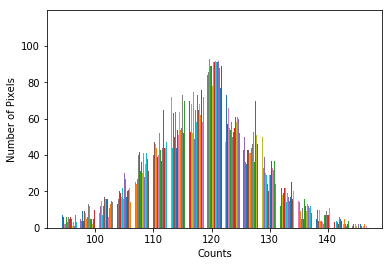

<Figure size 432x288 with 0 Axes>

In [3]:
image_data = fits.getdata(Light_list60[3])
plt.hist(image_data,bins='auto')
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.show()
plt.savefig('60s_histgram.png')

[Text(1,0,'90'), Text(1,0,'120'), Text(1,0,'150')]

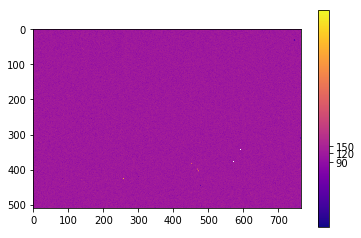

In [7]:
from matplotlib.colors import LogNorm
plt.imshow(image_data,cmap='plasma',norm=LogNorm())
cbar = plt.colorbar(ticks=[90,120,150])
cbar.ax.set_yticklabels(['90','120','150'])

In [12]:
final_science60 = []
err_60 = []
for j in Light_list60:
    
    data_l60 = fits.getdata(j)
    science60 = np.mean(data_l60)/60.
    final_science60.append(science60)
    err60 = np.std(data_l60)/60.
    err_60.append(err60)

final_science50 = []
err_50 = []
for j in Light_list50:
    
    data_l50 = fits.getdata(j)
    science50 = np.mean(data_l50)/50.
    final_science50.append(science50)
    err50 = np.std(data_l50)/50.
    err_50.append(err50)
    
final_science40 = []
err_40 = []
for j in Light_list40:
    
    data_l40 = fits.getdata(j)
    science40 = np.mean(data_l40)/40.
    final_science40.append(science40)
    err40 = np.std(data_l40)/40.
    err_40.append(err40)
    
final_science30 = []
err_30 = []
for j in Light_list30:
    
    data_l30 = fits.getdata(j)
    science30 = np.mean(data_l30)/30.
    final_science30.append(science30)
    err30 = np.std(data_l30)/30.
    err_30.append(err30)
    
print(fits.getdata(Light_list60[0])[0])
print(np.mean(fits.getdata(Light_list60[0]))/60)

[120 126 114 116 143 109 108 127 115 132 113 126 122 126 143 129 128 112
 117 134 133 127 123 129 117 121 126 122 115 117 119 123 111 128 111 134
 114 110 117 120 117 113 136 123 132 113 123 107 106 114 131 110 132 113
 111 130 129 106 129 128 116 123 112 109 119 135 122 132 117 118 126 122
 125 117 115 115 126 129 113 130 132 122 119 131 111 104 121 120 106 120
 103 139 125 112 128 122 136 103 126 119 147 135 122 116 108 120 118 122
 131 120 123 118 130 114 122 134 124 116 115 118 111 144  93 138 126 134
 128 111 119 117 122 121 132 120 125 136 121 135 119 119 110 121 120 124
 114 142 111 118 121 116 124 126 136 123 106 119 117 119 120 111 122 119
 106 111  94 111 128 105 114 121 112 118 127 132 119 124 137 106 111 106
 118 131 122 130 108 114 116 116 128 120 112 124 114 127 119 123 118 118
 124 110 128 106 125 129 113 129 118 101 109 125 103 119 135 111 119 112
 146 106 122 112 124 127 109 119  98 122 118 121 136 129 121 114 131 103
 115 113 129 112 110 128 123 139 119 122 110 106 12

In [196]:
import itertools
final_sciences = [final_science60,final_science50,final_science40,final_science30]
merged = list(itertools.chain.from_iterable(final_sciences))
errs = [err_60,err_50,err_40,err_30]
merged_err = list(itertools.chain.from_iterable(errs))
print('final science',merged)
print('err',merged_err)

final science [2.0089578794480754, 1.9314101413986073, 1.898171472510573, 1.979108547994361, 2.3147969242599, 2.2995613481994104, 2.2695254645649108, 2.3246988081507114, 2.3031612969370756, 2.7166335383826734, 2.636926951172626, 2.759977188260925, 2.8185276175829808, 2.7014138151992824, 2.7714996155324876, 2.7450769575804177, 3.5582905720022215, 3.5910145670468623, 3.6035749498056306, 3.476252466999872, 3.54598308342945]
err [0.3246184830402296, 0.3307060016601511, 0.17272329760579477, 0.17114977117431235, 0.1980341464458898, 0.196032541879315, 0.19684009937003175, 0.203565654441494, 0.20908632835952223, 0.23856154416706982, 0.24206119444995214, 0.2283679975874926, 0.22981292610969736, 0.22977455192510465, 0.22810629475226318, 0.23634514613781615, 0.3020308170913874, 0.30497712570857016, 0.3020382880723638, 0.301932404228966, 0.3020782280145172]


### Time set

In [197]:
time_set = []
for i in Light_list:
    
    data_l = fits.open(i)
    
    hh = int(data_l[0].header['DATE-OBS'][11:][:2])
    mm = int(data_l[0].header['DATE-OBS'][11:][3:5])
    ss = int(data_l[0].header['DATE-OBS'][11:][6:8])
    time_set.append(hh + mm/60 + ss/3600)
    time = (np.array(time_set)-time_set[0])*60.*60.
    
print('time in s',time)

time in s [   0.  112.  176.  241.  359.  413.  468.  537.  591.  708.  752.  797.
  841.  886.  945.  989. 1062. 1097. 1131. 1166. 1200.]


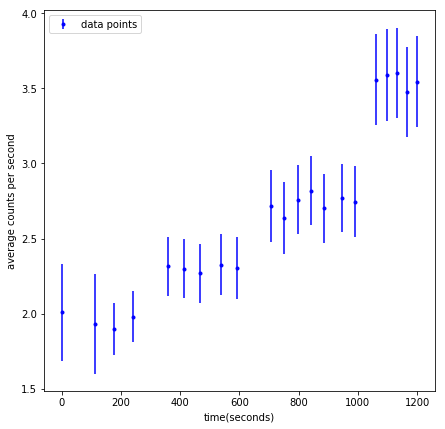

In [203]:
plt.figure(figsize=(7,7))
linear_err = np.array(merged_err)/np.array(merged)
plt.errorbar(time,merged,merged_err,fmt=".",color="blue",label="data points")
plt.xlabel('time(seconds)')
plt.ylabel('average counts per second')
plt.legend(loc='upper left')
plt.savefig('skybrightness-time.png')

0.0005780014391087322 0.5598302575196914
rotational rate 1.2632312460303581e-05


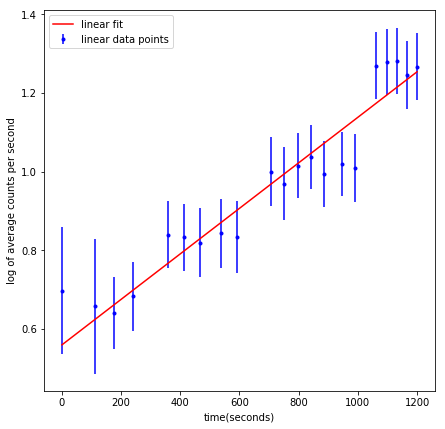

In [211]:
def func(x,a,b):
    return a*x + b

#define the terms needed to find u,b and find u,b
wi = 1/(linear_err)**2
W = np.sum(wi)
X_1 = np.sum(wi*time)
Y_1 = np.sum(wi*np.log(merged))
X_2 = np.sum(wi*np.array(time)**2)
Y_2 = np.sum(wi*np.log(merged)**2)
P = np.sum(wi*time*np.log(merged))
delta = (W*X_2 - X_1**2)

a = (W*P - X_1*Y_1) / delta
b = (X_2*Y_1 - X_1*P) / delta
print(a,b)

plt.figure(figsize=(7,7))
plt.plot(time, func(np.array(time),a,b) ,color="red",label="linear fit")
plt.errorbar(time,np.log(merged),linear_err,fmt=".",color="blue",label="linear data points")
plt.xlabel('time(seconds)')
plt.ylabel('log of average counts per second')
plt.legend(loc='upper left')
plt.savefig('skybrightness-time-linfit.png')

rotation_rate = (a)/(6.1*0.2787*((6378/256) +2))
print('rotational rate',rotation_rate)

In [212]:
x = np.log(merged)
lam = func(np.array(time),a,b)
X=np.sum((x**2-lam**2)/linear_err**2)
X/19

0.5002226714460487